In [1]:
import tensorflow as tf

# 60,000 training samples 10,000 testing samples

In [2]:
mnist=tf.keras.datasets.mnist

# Divide into Train and Test datasets

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

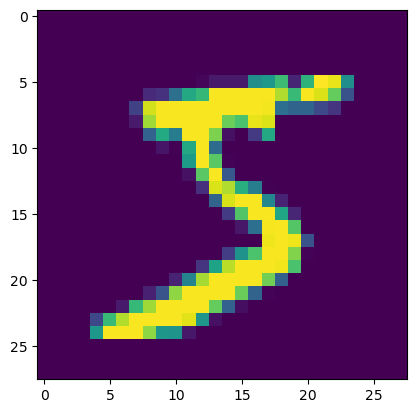

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

# Before Normalization

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# It has (0,255)
# Normalize to make (0,1)

In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

# After normalization

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Resizing image for convolution operation

In [9]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print('Training Samples Dimensions',x_trainr.shape)
print('Testing Samples Dimensions',x_testr.shape)

Training Samples Dimensions (60000, 28, 28, 1)
Testing Samples Dimensions (10000, 28, 28, 1)


# Creating Deep Neural Network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [11]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#fully connected layer 2
model.add(Dense(32))
model.add(Activation('relu'))

#fully connected layer 3
model.add(Dense(10))
model.add(Activation('softmax'))



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [12]:
print('Training samples =',len(x_trainr))

Training samples = 60000


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 125s 82ms/step - loss: 0.3362 - accuracy: 0.8941 - val_loss: 0.1219 - val_accuracy: 0.9612
Epoch 2/5
1313/1313 [==============================] - 106s 80ms/step - loss: 0.1046 - accuracy: 0.9679 - val_loss: 0.1004 - val_accuracy: 0.9692
Epoch 3/5
1313/1313 [==============================] - 109s 83ms/step - loss: 0.0740 - accuracy: 0.9767 - val_loss: 0.0700 - val_accuracy: 0.9778
Epoch 4/5
1313/1313 [==============================] - 108s 83ms/step - loss: 0.0559 - accuracy: 0.9823 - val_loss: 0.0650 - val_accuracy: 0.9795
Epoch 5/5
1313/1313 [==============================] - 112s 85ms/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0663 - val_accuracy: 0.9809


In [15]:
#evaluating on testing dataset MNIST
test_loss,test_acc = model.evaluate(x_testr,y_test)
print('Test loss on 10,000 test samples',test_loss)
print('Validation Accuracy on 10,000 test samples',test_acc)

313/313 [==============================] - 23s 17ms/step - loss: 0.0582 - accuracy: 0.9834
Test loss on 10,000 test samples 0.05817064642906189
Validation Accuracy on 10,000 test samples 0.9833999872207642


In [16]:
predictions=model.predict([x_testr])

In [17]:
print(predictions)

[[1.35844420e-08 1.70403273e-05 2.96661037e-05 ... 9.99949574e-01
  9.93165941e-08 1.72282739e-07]
 [1.11024499e-04 1.71764132e-05 9.99819696e-01 ... 2.66223446e-06
  1.17178661e-05 1.11711552e-06]
 [4.47790683e-07 9.99959469e-01 1.32345792e-06 ... 1.16949413e-05
  2.14320994e-06 5.21774382e-07]
 ...
 [6.04822281e-09 2.13805421e-07 1.00543005e-08 ... 7.80633727e-08
  4.95309314e-06 4.92728250e-05]
 [1.45796457e-05 4.10358439e-07 3.91131738e-10 ... 5.28723831e-07
  3.50421091e-04 6.30109844e-06]
 [5.18374363e-05 1.60760543e-08 1.17269747e-06 ... 1.03538603e-07
  2.14086617e-06 6.97962093e-07]]


In [18]:
print(np.argmax(predictions[0]))

7


In [19]:
plt.imshow(x_test[0])

In [20]:
print(np.argmax(predictions[128]))

8


In [21]:
plt.imshow(x_test[128])

In [22]:
import cv2
import pyttsx3

In [26]:
img=cv2.imread("three.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resi=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
img=tf.keras.utils.normalize(resi,axis=1)
img=np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1)
prediction=model.predict(img)
r=(np.argmax(prediction))
engine = pyttsx3.init()
engine.say(r)
engine.runAndWait()
print(r)

3
